# Introducción

In [1]:
import pickle
import shap
shap.initjs()

In [2]:
data_path = 'explainer.sav'
explainer = pickle.load(open(data_path, 'rb'))

In [3]:
data_path = 'shap_values.sav'
shap_values = pickle.load(open(data_path, 'rb'))

In [4]:
data_path = 'X_test_p.sav'
X_test_p = pickle.load(open(data_path, 'rb'))

In [5]:
data_path = 'X_test_pd.sav'
X_test_pd = pickle.load(open(data_path, 'rb'))

In [6]:
data_path = 'y_test.sav'
y_test = pickle.load(open(data_path, 'rb'))

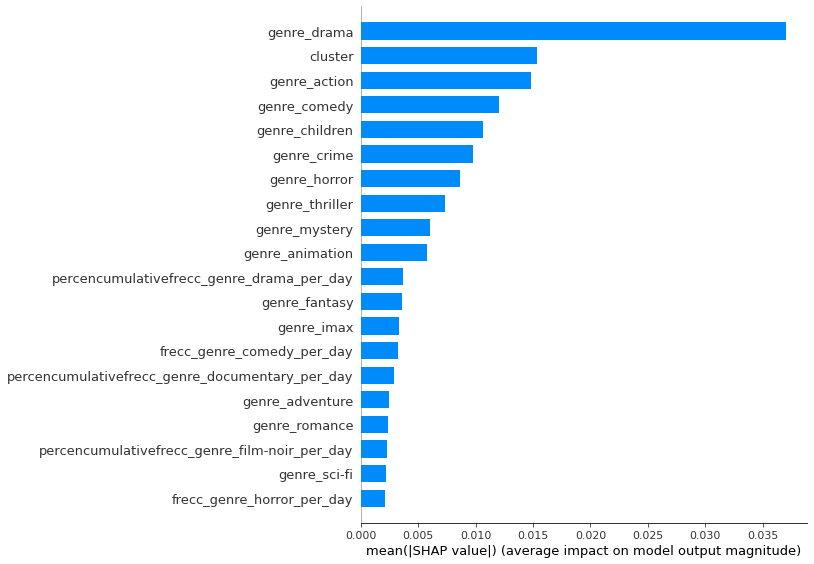

In [7]:
shap.summary_plot(shap_values,
                  features=X_test_pd,
                  feature_names=X_test_pd.columns,
                  plot_type="bar")

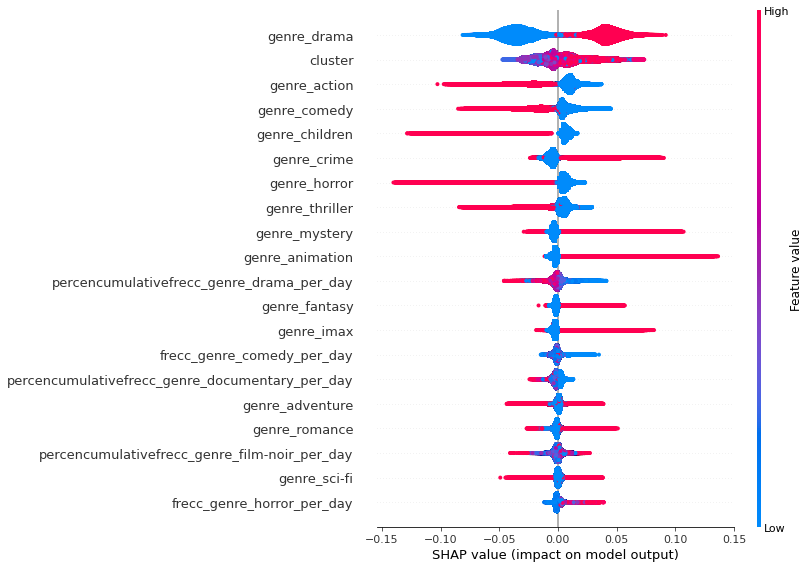

In [8]:
shap.summary_plot(shap_values,                   
                  features=X_test_p,
                  feature_names=X_test_pd.columns)

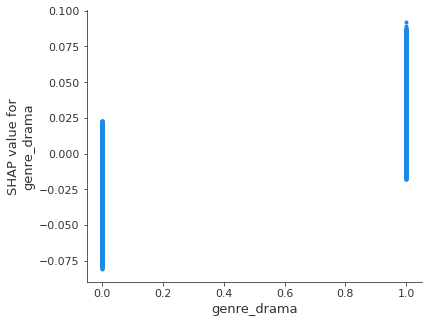

In [9]:
shap.dependence_plot('genre_drama',
                     shap_values,
                     X_test_pd,
                     interaction_index=None)

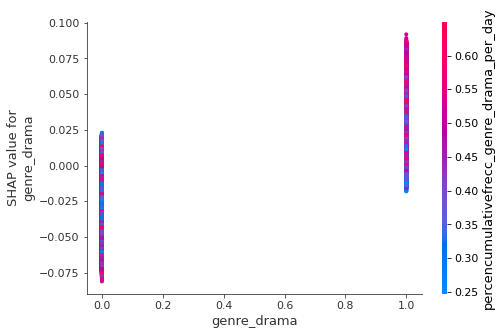

In [10]:
shap.dependence_plot('genre_drama',
                     shap_values,
                     X_test_pd,
                     interaction_index='percencumulativefrecc_genre_drama_per_day')

### Análisis de un valor individual

In [11]:
i=3

In [12]:
y_test

0          1
1          0
2          0
3          1
4          0
          ..
3014372    0
3014373    1
3014374    1
3014375    0
3014376    1
Name: high_rating, Length: 3014377, dtype: int64

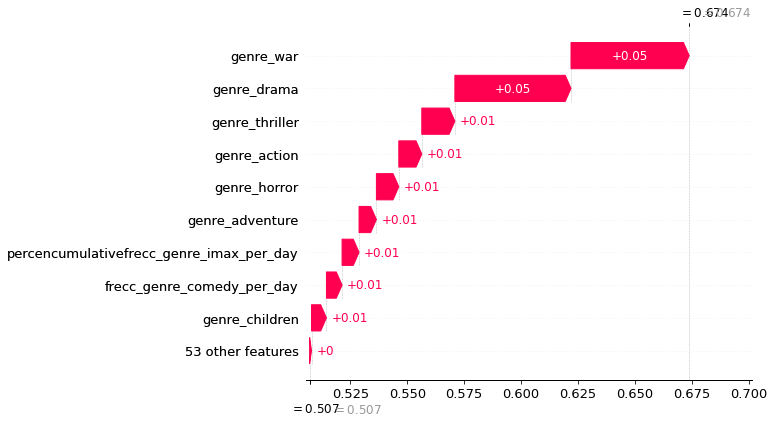

In [13]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value,
                                       shap_values[i],
                                       feature_names=X_test_pd.columns)

In [14]:
shap.force_plot(explainer.expected_value,
                shap_values[i],
                X_test_p[i],
                feature_names=X_test_pd.columns)

In [15]:
i=3014375

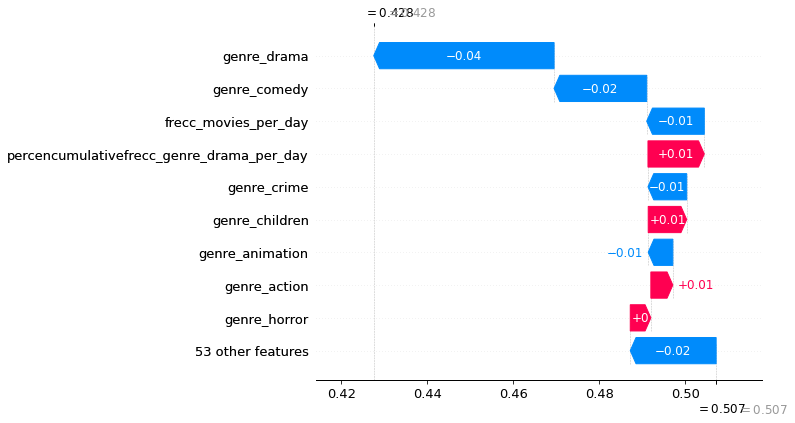

In [16]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value,
                                       shap_values[i],
                                       feature_names=X_test_pd.columns)

In [17]:
shap.force_plot(explainer.expected_value,
                shap_values[i],
                X_test_p[i],
                feature_names=X_test_pd.columns)

# Resumen 

* Se abordó un problema de naturaleza de Sistema de Recomendación como uno de Aprendizaje Supervisado.
* Con base en el supuesto de que se conoce el listado completo de películas que usuarios tanto nuevos como conocidos van a dar *rating*, se utiliza cluster de ellas para poder colapsar la información de usuarios y poder trabajar razonablemente con un conjunto de datos sin recurrir a herramientas para manejo de big data.